In [1]:
!pip install scikit-optimize

In [2]:
# ======================================
# 1. Import Libraries
# ======================================

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, RationalQuadratic, ConstantKernel
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.compose import TransformedTargetRegressor
from skopt import gp_minimize
from skopt.space import Real
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm

In [4]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [5]:
inputs5 = np.array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937, 0.41761768, 0.12260384],
       [0.11987923, 0.86254031, 0.64333133, 0.84980383],
       [0.12688467, 0.15342962, 0.77016219, 0.19051811],
       [0.000025, 0.000025, 0.000025, 0.000025],
       [0.001200, 0.001200, 0.001200, 0.001200],                    
       [0.110000, 0.110000, 0.110000, 0.110000],
       [0.000100, 0.000100, 0.000100, 0.000100],
       [0.080000, 0.080000, 0.080000, 0.080000],
       [0.060000, 0.060000, 0.060000, 0.060000],
       [0.006000, 0.006000, 0.006000, 0.006000],
       [0.000050, 0.000050, 0.000050, 0.000050],
       [0.004000, 0.004000, 0.004000, 0.004000],
       [0.003000, 0.003000, 0.003000, 0.003000],
       [0.001000, 0.001000, 0.001000, 0.001000],
       [0.100000, 0.100000, 0.100000, 0.100000]])

In [6]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [7]:
outputs5 = np.array([6.44434399e+01, 1.83013796e+01, 1.12939795e-01, 4.21089813e+00,
       2.58370525e+02, 7.84343889e+01, 5.75715369e+01, 1.09571876e+02,
       8.84799176e+00, 2.33223610e+02, 2.44230883e+01, 6.44201468e+01,
       6.34767158e+01, 7.97291299e+01, 3.55806818e+02, 1.08885962e+03,
       2.88667516e+01, 4.51815703e+01, 4.31612757e+02, 9.97233189e+00, 163.1224399887968, 163.11959383629446, 162.01664471939498, 163.12225982059496,
       162.61215821647787, 162.83846388328118, 163.10740751126517, 163.1223799551744,
       163.11259955414286, 163.11513299465264, 163.12008187278335, 162.2575962176])

In [8]:
X = inputs5
y = outputs5

y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1)).ravel()

In [9]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

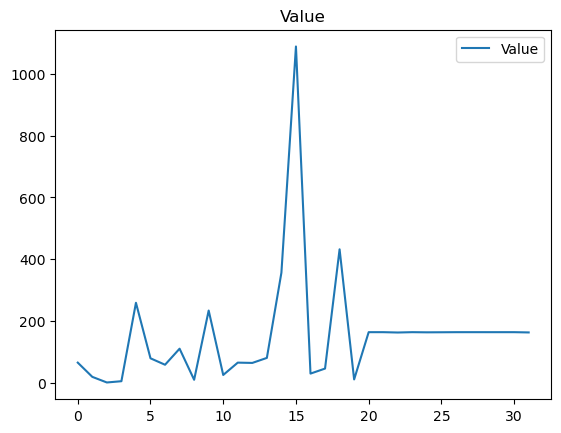

In [10]:
df = pd.DataFrame(outputs5, columns = ['Value'], index = range(outputs5.size))
plot = df.plot(title="Value")

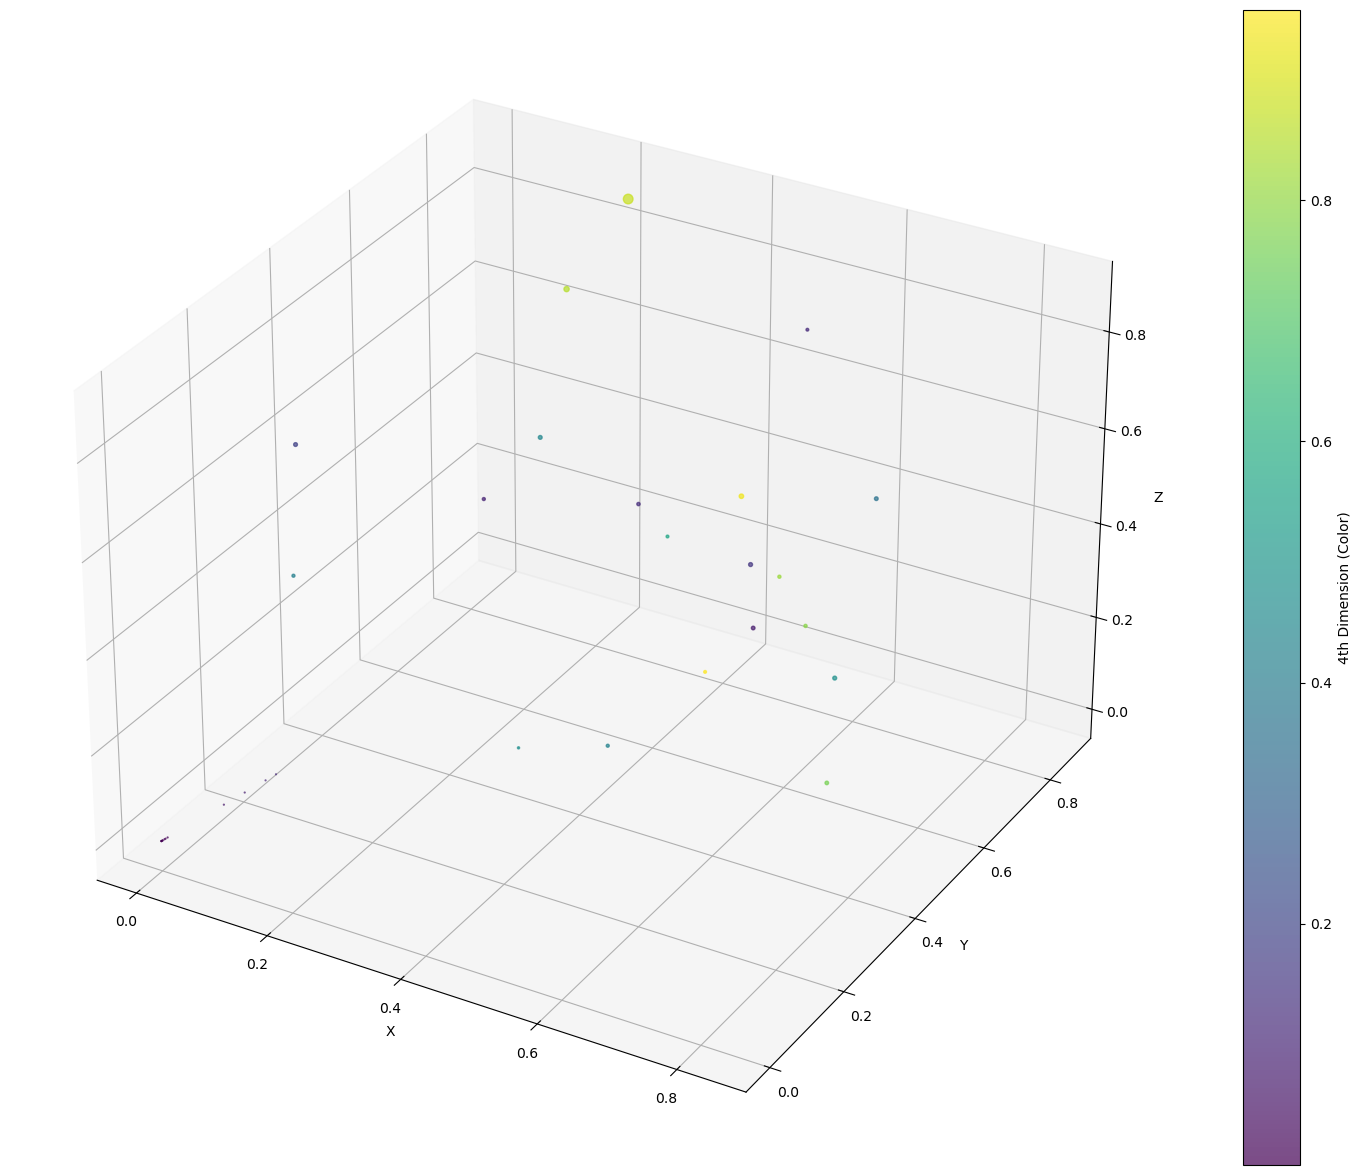

In [11]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 3], s = abs(y)*10, cmap='viridis', alpha=0.7)

fig.colorbar(sc, label='4th Dimension (Color)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [12]:
#Define kernel used
kernel_best_Q5 = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=[1.5, 2.5, 2.5, 1.5], nu=2.5, length_scale_bounds=(1e-3, 1e8))

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(
    kernel=kernel_best_Q5,
    n_restarts_optimizer=50,
    alpha=1e-3,
    random_state=42,
    normalize_y=False)

# Fit to data
gp.fit(X, y)

#Print the kernel to check if the value of optimized kernel is normal 
print("Optimized kernel:", gp.kernel_)

Optimized kernel: 5.94**2 * Matern(length_scale=[24.6, 7.42, 1.17, 0.861], nu=2.5)


In [13]:
def hybrid_ucb(X, gp, kappa=0.1, alpha=0.5):
    mu, sigma = gp.predict(X, return_std=True)
    return alpha * mu + (1 - alpha) * (mu + kappa * sigma)


def optimize_acquisition_global(acquisition_func, gp, bounds, kappa=4.0, maxiter=100, popsize=30):
    # Objective to minimize (negative because DE minimizes)
    def objective(x):
        x = np.array(x).reshape(1, -1)
        return -acquisition_func(x, gp, kappa=kappa)[0]

    # Differential Evolution global optimization
    result = differential_evolution(
        objective,
        bounds=bounds,
        maxiter=maxiter,
        popsize=popsize,
        polish=True,       # refine the result locally at the end
        disp=True           # print optimization progress
    )

    x_next = result.x
    best_val = -result.fun
    return x_next, best_val

In [ ]:
bounds = [(0, 1), (0, 1), (0, 1), (0 ,1)]

next_point1, best_val1 = optimize_acquisition_global(
        acquisition_func=hybrid_ucb,
        gp=gp,
        bounds=bounds,
        kappa=0.05,      # larger kappa → more exploration
        maxiter=20000,     # number of DE iterations
        popsize=5000      # population size
    )

# Optimize acquisition
print("Next query point (by UCB):", next_point1)

differential_evolution step 1: f(x)= -8.37952167519998
differential_evolution step 2: f(x)= -8.37952167519998
differential_evolution step 3: f(x)= -8.489498443765864
differential_evolution step 4: f(x)= -8.489498443765864
differential_evolution step 5: f(x)= -8.489498443765864
differential_evolution step 6: f(x)= -8.489498443765864
differential_evolution step 7: f(x)= -8.493169747127377
